# Store Location Analysis Using Heatmaps

Each heatmap gives a different perspective on customer behavior and demographics.

In [30]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Load the customer data
df = pd.read_csv("../project/Customers3_oversampled.csv")

## 1. Correlation Heatmap
Shows how different numeric features (like age, purchase amount, previous purchases) are related. High correlation means the features move together.

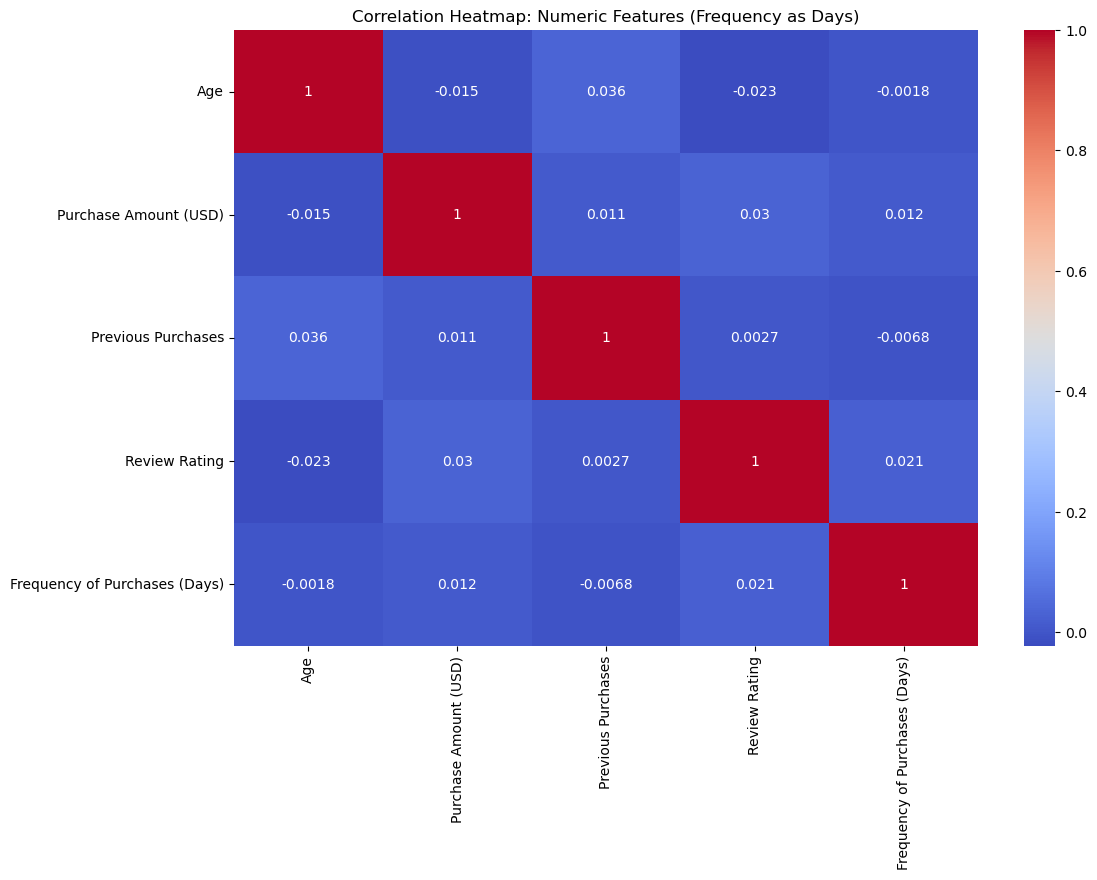

In [32]:

# Convert 'Frequency of Purchases' into numeric values (days)
freq_map = {
    'Weekly': 7,
    'Bi-Weekly': 14,
    'Fortnightly': 14,
    'Monthly': 30,
    'Quarterly': 90,
    'Annually': 365,
    'Every 3 Months': 90
}
df['Frequency of Purchases (Days)'] = df['Frequency of Purchases'].map(freq_map)

# Calculate the correlation including the new numeric column.
cols = ["Age", "Purchase Amount (USD)", "Previous Purchases", "Review Rating", "Frequency of Purchases (Days)"]
df_corr = df[cols].apply(pd.to_numeric, errors='coerce')
corr = df_corr.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Numeric Features (Frequency as Days)")
plt.show()



**Note:** There is no correlation between Age, Purchase Amount (USD), Previous Purchases, Review Rating, and Frequency of Purchases (Days). This means these features do not strongly influence each other in this dataset.

## 2. Gender Distribution Heatmap (Diverging Palette)
Shows which locations have more female or male customers. Useful for brands targeting young women.

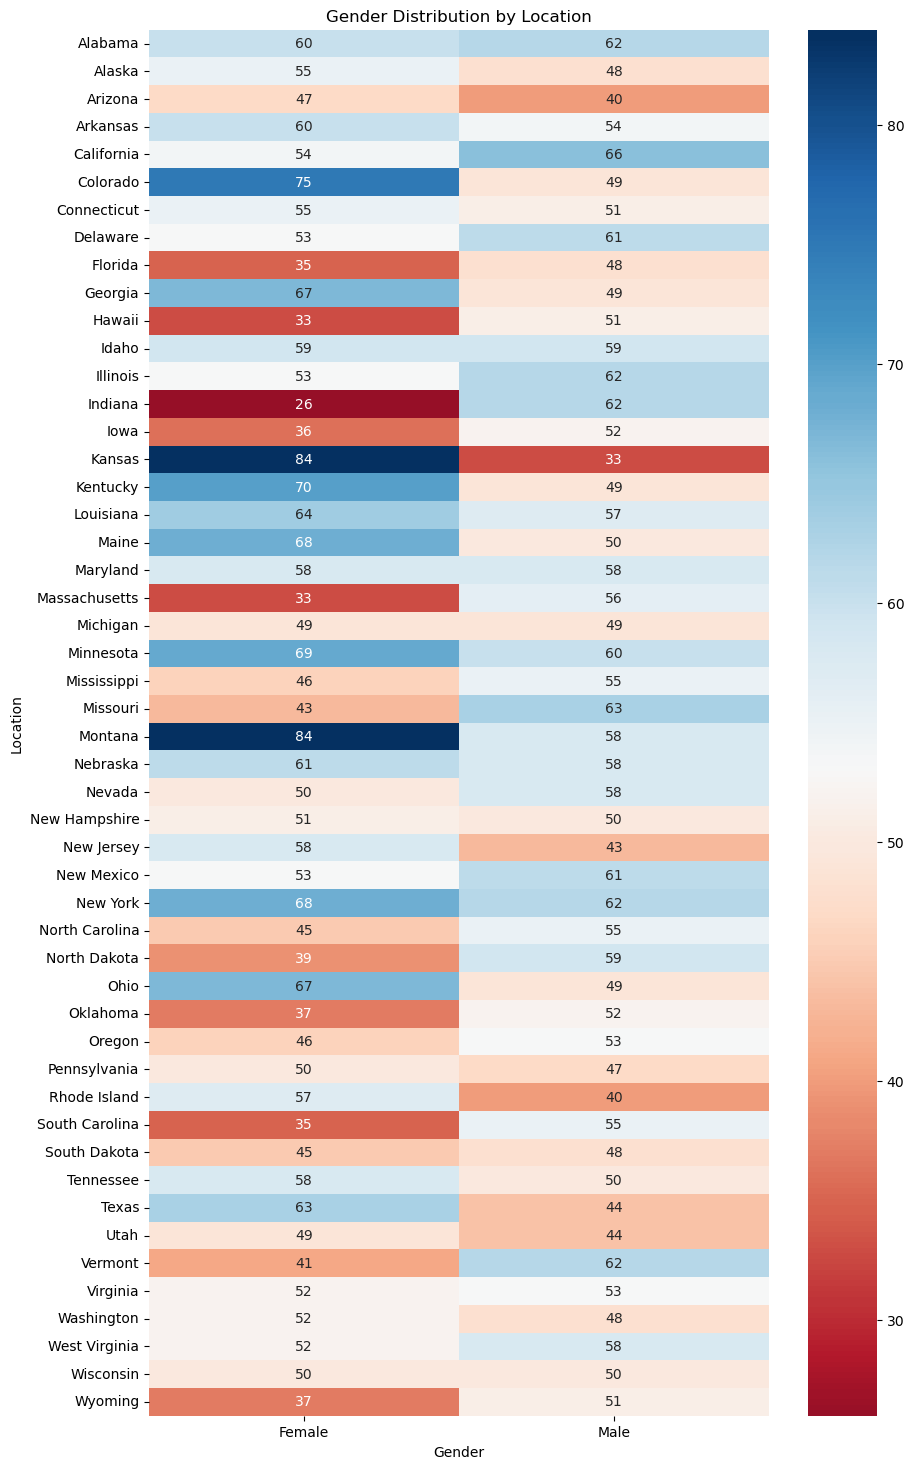

In [33]:
pivot2 = df.pivot_table(index="Location", columns="Gender", values="Customer ID", aggfunc="count", fill_value=0)
plt.figure(figsize=(10,18))
sns.heatmap(pivot2, annot=True, cmap='RdBu', center=pivot2.values.mean())
plt.title("Gender Distribution by Location")
plt.show()


**Note:**
States with darker blue in the "Female" column like: 

* Colorado, 
* Kansas, 
* Montana, 
* Nebraska, 
* Maine, 
* New York 

Montana and Kansas have a higher number of female customers.

## 3. Subscription Status Heatmap (Categorical Palette)
Shows where customers are more engaged (subscribed). More subscriptions mean more loyal customers.

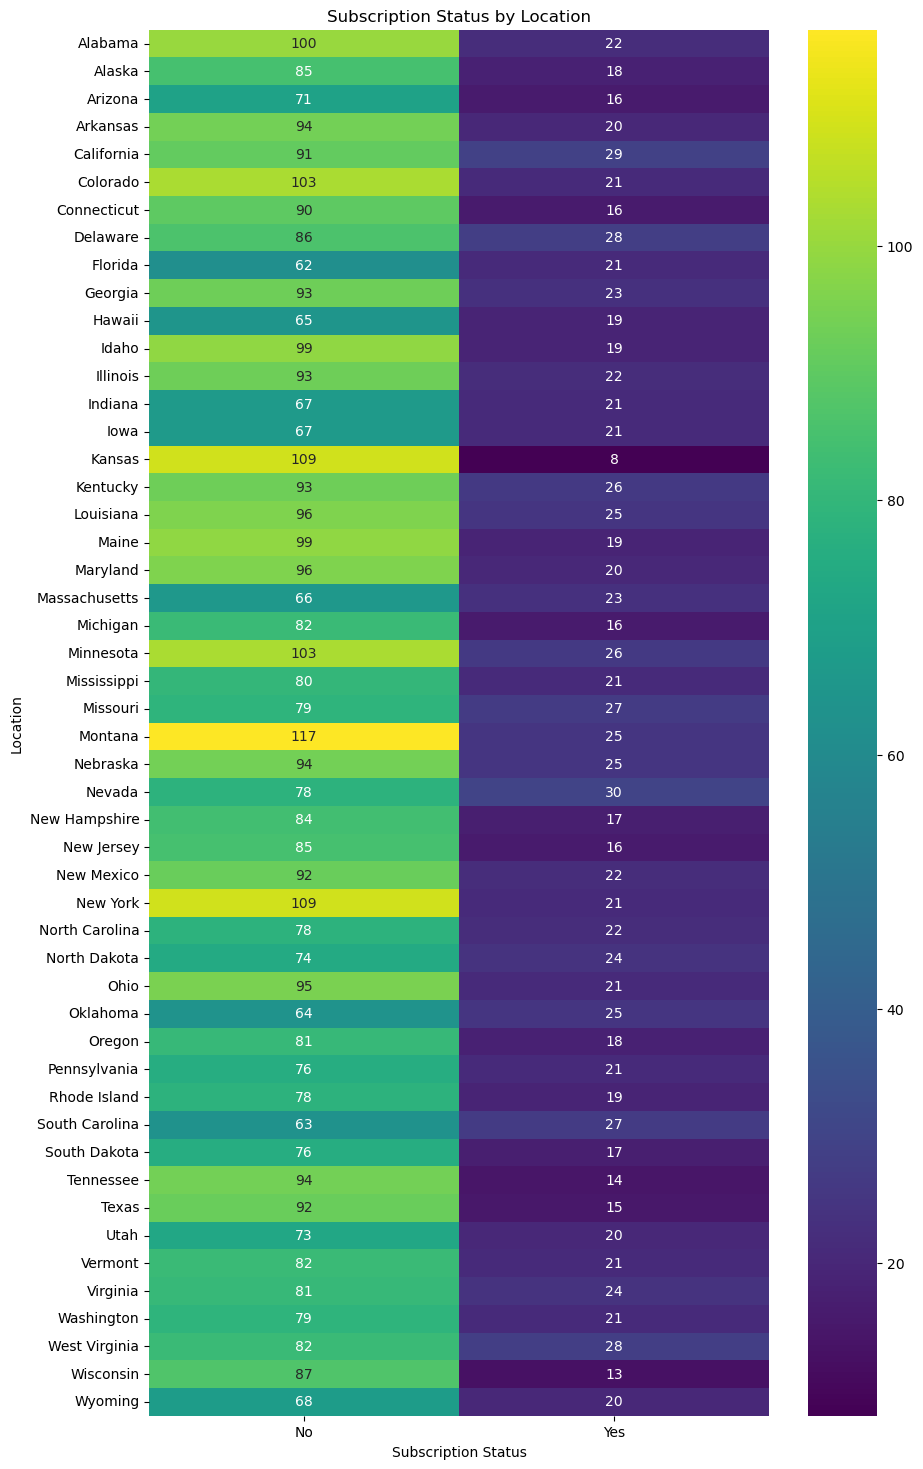

In [34]:
pivot4 = df.pivot_table(index="Location", columns="Subscription Status", values="Customer ID", aggfunc="count", fill_value=0)
plt.figure(figsize=(10,18))
sns.heatmap(pivot4, annot=True, fmt='d', cmap='viridis')
plt.title("Subscription Status by Location")
plt.show()

**Note:**
Customers who are not subscribed. These states represent strong opportunities to attract new customers like:

* Montana, 
* Kansas,
* New York, 
* Colorado, 
* Minnesota, 
* Alabama, 
* Maine

The bright yellow color for "No" means Montana has a very high number of customers who are not subscribed.

The dark purple color for "Yes" means Montana has a much smaller group of loyal, subscribed customers.

